#### Exam description
For this exam, you will predict the target values for the test.csv. 

#### Your task:
find a good machine learning model to predict the target value. Then predict the target values of the instances in the test.csv. 

#### Exam rules
- You can use only the machine learning models discussed in this course. 
    - If the prediction is based on a model that is not discussed in class, one of the models in your submission will randomly be selected for grading. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 
- Save the final prediction array as ``final_test_prediction``. 
- <font color = 'red'> The final prediction will be evaluated using the **roc_auc_score** function. </font>

#### Devliverable
Submit ONLY the iPython notebook or the .py file of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|Machine learning model | Demonstrate limited understanding of methods used to train machine learning models | Demonstrate the ability to understand techniques used to train machine learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

#### Dataset
This dataset is used to predict complications of Mycardial Infraction (MI) based on the information about the patient. The target value 0 is no complication and 1 means complication within the first three days of hospitalization. 

MI is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which is exposed to chronic stress factors, irregular and not always balanced nutrition. In the United States, for example, more than a million people suffer from MI every year, and 200-300 thousand of them die from acute MI before arriving at the hospital.
In this regard, predicting complications of myocardial infarction in order to timely carry out the necessary preventive measures is an important task.

* Age
* Gender
* Myocardial:  Quantity of myocardial infarctions in the anamnesis – Ordinal
* Exertional angina: Exertional angina pectoris in the anamnesis
* FC: Functional class (FC) of angina pectoris in the last year – Ordinal
* Heart Disease: Coronary heart disease (CHD) in recent weeks, days before admission to hospital
* Heredity: Heredity on CHD
* Hypertension: Presence of an essential hypertension
* Symptomatic hypertension
* Duration: Duration of arterial hypertension
* Arrhythmia: Observing of arrhythmia in the anamnesis
* Systolic_emergency: Systolic blood pressure according to Emergency Cardiology Team
* Diastolic_emergency: Diastolic blood pressure according to Emergency Cardiology Team
* Systolic_intensive_care: Systolic blood pressure according to intensive care unit
* Diastolic_intensive_care: Diastolic blood pressure according to intensive care unit
* Potassium: Serum potassium content
* Sodium: Serum sodium content
* AlAT: Serum AlAT content
* AsTK: Serum AsTK content
* WBC: White Blood Cell Count
* ESR: Erythrocyte sedimentation rate
* Time: Time elapsed from the beginning of the attack of CHD to the hospital
* Outcome: target column

In [1]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier

In [2]:
# !pip install imblearn
random_state=42

# Preprocessing ``train.csv`` (15 points)

In [3]:
#preprocessing train data set

train = pd.read_csv("train.csv")


def preprocess(df, istrain=True):
    ## Data Imputation
    # Replace ? as NA (missing values)
    df.replace("?",np.nan,inplace=True)

    # Keep rows having values in >=15 columns
    if istrain:
        df.dropna(thresh=15,inplace=True)

    # Remove columns having NA>800
    df.drop(['Heredity','Systolic_emergency', 'Diastolic_emergency'],axis=1,inplace=True)

    # Fill with Median
    df.Age.fillna(df.Age.median(),inplace=True)

    df[['myocardial',
           'Exertional angina',
           'Heart Disease',
           'FC',
           'Hypertension',
           'Symptomatic hypertension',
           'Duration',
           'Arrhythmia']] = df[['myocardial',
           'Exertional angina',
           'Heart Disease',
           'FC',
           'Hypertension',
           'Symptomatic hypertension',
           'Duration',
            'Arrhythmia']].fillna(df.mode().iloc[0])

    df[['Systolic_intensive_care',
           'Diastolic_intensive_care',
           'Potassium',
           'Sodium',
           'AlAT',
           'AsAT',
           'WBC',
           'ESR',
           'Time']] = df[['Systolic_intensive_care',
           'Diastolic_intensive_care',
           'Potassium',
           'Sodium',
           'AlAT',
           'AsAT',
           'WBC',
           'ESR',
           'Time']].astype("float")


    df[['Systolic_intensive_care',
           'Diastolic_intensive_care',
           'Potassium',
           'Sodium',
           'AlAT',
           'AsAT',
           'WBC',
           'ESR',
           'Time']] = df[['Systolic_intensive_care',
           'Diastolic_intensive_care',
           'Potassium',
           'Sodium',
           'AlAT',
           'AsAT',
           'WBC',
           'ESR',
           'Time']].fillna(df.mean())

    df[['Systolic_intensive_care',
           'Diastolic_intensive_care',
           'Sodium',
           'ESR',
           'Time',
           'myocardial']] = df[['Systolic_intensive_care',
           'Diastolic_intensive_care',
           'Sodium',
           'ESR',
           'Time',
            'myocardial']].astype("int64")


    ## Data Transformation
    df.Age = df.Age.astype("int64")

    df['FC'] = df['FC'].map({'No angina':0,'I FC':1,'II FC':2,'III FC':3,'IV FC':4})
    df['Hypertension'] = df['Hypertension'].map({'No':0,'Stage 1':1,'Stage 2':2,'Stage 3':3})
    df['Exertional angina'] = df['Exertional angina'].map({'Never':0,'During the last year':1,'One year ago':2,'Two years ago':3,'Three years ago':4,'Four to five years ago':5,'More than five years ago':6})
    df['Gender'] = df['Gender'].map({'Female':0,'Male':1})
    df['Symptomatic hypertension'] = df['Symptomatic hypertension'].map({'No':0,'Yes':1})
    df['Arrhythmia'] = df['Arrhythmia'].map({'No':0,'Yes':1})
    df['Duration'] = df['Duration'].map({'No hypertension':0,'One year':1,'Two years':2,'Three years':3,'Four years':4,'Five years':5,'Six to ten years':6,'More than 10 years':7})

    # # Make Category Type
    df['Heart Disease'] = df['Heart Disease'].astype("category")
    df = pd.get_dummies(df)
    return df
train = preprocess(train)

In [4]:
scaler = MinMaxScaler()
def scale(df):
    return scaler.transform(df)

In [5]:
# The data is heavily imbalanced
train['Outcome'].value_counts()

0    1037
1     185
Name: Outcome, dtype: int64

In [6]:
X = train.loc[:,train.columns!="Outcome"]
y = train.loc[:,train.columns=="Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=random_state)

In [7]:
# The data is heavily imbalanced
y_train['Outcome'].value_counts()

0    726
1    129
Name: Outcome, dtype: int64

In [8]:
from sklearn.utils import resample

training =  pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
train_majority = training[training.Outcome==0]
train_minority = training[training.Outcome==1]
 
# Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                    replace=True,     # sample with replacement
                                    n_samples=715,    # to match majority class
                                    random_state=random_state) # reproducible results
 
# Combine majority class with upsampled minority class
training = pd.concat([train_majority, train_minority_upsampled])

X_train = training.loc[:,training.columns!="Outcome"]
y_train = training.loc[:,training.columns=="Outcome"]
 
# Display new class counts
y_train.Outcome.value_counts()

0    726
1    715
Name: Outcome, dtype: int64

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scale(X_test)

# Preprocessing ``test.csv`` (10 points)

In [10]:
#preprocessing test dataset using same function used for train dataset

test = pd.read_csv("test.csv")
test = preprocess(test,istrain=False)
test = scale(test)

# Machine learning models (20 points)

<b>KNN Classifier </b>

In [11]:
#Knn and gridsearch

grid_knn_parameters = {'n_neighbors':range(1,20), 'p': [1,2],
            'weights': ['uniform','distance'],
            'metric': ['manhattan']}

knn_CV = GridSearchCV(KNeighborsClassifier(), grid_knn_parameters, verbose = 1, cv = 7, n_jobs = -1,  scoring='roc_auc',)

Knn_results = knn_CV.fit(X_train, y_train)

Fitting 7 folds for each of 76 candidates, totalling 532 fits


In [12]:
print("KNN grid search Best Parameters ")
best_parameters_knn=Knn_results.best_params_
best_parameters_knn

KNN grid search Best Parameters 


{'metric': 'manhattan', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}

In [13]:
best_para_Knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 19, p = 1, weights = 'distance', algorithm ='auto')
best_para_Knn.fit(X_train, y_train)
Knn_value_y = best_para_Knn.predict(X_test)



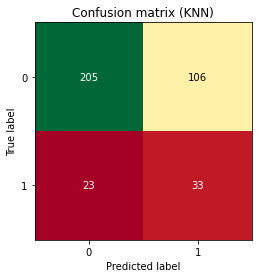

In [14]:
import mglearn
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = Knn_value_y, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['0','1'], yticklabels=['0','1'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix (KNN)")
plt.gca().invert_yaxis()

In [15]:
Summary_Knn= {'Type': 'K-nearest Neighbors (KNN) Classification Model', 
              'Training Score': best_para_Knn.score(X_train, y_train)*100,
              'precision_score':precision_score(y_test, best_para_Knn.predict(X_test)),
              'Testing Score':best_para_Knn.score(X_test, y_test)*100,
              'recall_score':recall_score(y_test, best_para_Knn.predict(X_test)),
              'f1 Score':f1_score(y_test, best_para_Knn.predict(X_test)),
             'roc_auc': roc_auc_score(y_test,best_para_Knn.predict(X_test))};

In [16]:
Summary_Knn

{'Type': 'K-nearest Neighbors (KNN) Classification Model',
 'Training Score': 100.0,
 'precision_score': 0.23741007194244604,
 'Testing Score': 64.85013623978202,
 'recall_score': 0.5892857142857143,
 'f1 Score': 0.3384615384615385,
 'roc_auc': 0.6242248507119891}

<h2>2. Logistic Regression</h2>

# According to above graph, C=1 & l2 penalty, test accuracy is best.

<b>Applying Grid Search with Logistic Regression</b>

In [17]:
#logistic regression

logistic = LogisticRegression(random_state=random_state)
param_grid_logit = { 'max_iter' : range(1,200), 'penalty' : ['l2','l1'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
logit_class_CV = GridSearchCV(estimator = logistic, param_grid = param_grid_logit, cv = 5, verbose = 1, n_jobs = -1, return_train_score = True,  scoring='roc_auc')
GS_results_logit = logit_class_CV.fit(X_train, y_train)

print("Logistic grid search Best parameters: ")
best_parameters_logit = logit_class_CV.best_params_
best_parameters_logit

Fitting 5 folds for each of 2388 candidates, totalling 11940 fits
Logistic grid search Best parameters: 


{'C': 10, 'max_iter': 12, 'penalty': 'l2'}

In [18]:
best_para_logistic = LogisticRegression( C = 10, max_iter = 12, penalty ='l2', solver='liblinear',class_weight='balanced',random_state=random_state)

best_para_logistic.fit(X_train,y_train)
logistic_value_y = best_para_logistic.predict(X_test)

print('Training score: {:.3f}'.format(best_para_logistic.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(best_para_logistic.score(X_test, y_test)))

Training score: 0.777
Testing score: 0.703


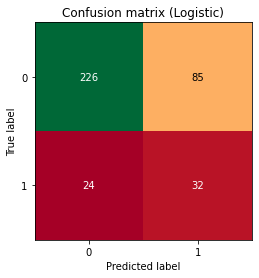

In [19]:
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = logistic_value_y, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['0','1'],yticklabels=['0','1'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix (Logistic)")
plt.gca().invert_yaxis()

In [20]:
print("Logistic grid search Best Score ")
GS_results_logit.best_score_

Logistic grid search Best Score 


0.833618030528753

In [21]:
Summary_Logistic= {'Type': 'Logistic Regression', 'Train Score': best_para_logistic.score(X_train, y_train)*100,
              'Testing Score':best_para_logistic.score(X_test, y_test)*100,
                   'precision_score':precision_score(y_test, best_para_logistic.predict(X_test)),
                   'recall_score':recall_score(y_test, best_para_logistic.predict(X_test)),
              'f1 Score':f1_score(y_test, best_para_logistic.predict(X_test)),
                   'roc_auc': roc_auc_score(y_test,best_para_logistic.predict(X_test))};

In [22]:
Summary_Logistic

{'Type': 'Logistic Regression',
 'Train Score': 77.72380291464262,
 'Testing Score': 70.29972752043598,
 'precision_score': 0.27350427350427353,
 'recall_score': 0.5714285714285714,
 'f1 Score': 0.3699421965317919,
 'roc_auc': 0.6490583371612311}

<b>3. Linear Support Vector Machine Classifier</b>

<b>Applying Grid Search with Linear Support Vector Machine Classifier</b>

In [23]:
#SVM Linear
param_linearSVM = { 'max_iter' : range(1,200),'C' : [ 0.001,0.01, 0.1, 1, 10, 100, 1000]}

CV_linearSVM = GridSearchCV(estimator = LinearSVC(random_state=random_state), param_grid = param_linearSVM ,scoring='roc_auc',cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
GS_results_linearSVM = CV_linearSVM.fit(X_train, y_train)

best_parameters_linearSVM = CV_linearSVM.best_params_
print(best_parameters_linearSVM)

Fitting 5 folds for each of 1393 candidates, totalling 6965 fits
{'C': 1, 'max_iter': 36}


In [24]:
print("Best score : Linear SVM grid search ")
GS_results_linearSVM.best_score_

Best score : Linear SVM grid search 


0.8340635745926251

In [25]:
print("Best parameters : Linear SVM grid search ")
best_parameters_linearSVM

Best parameters : Linear SVM grid search 


{'C': 1, 'max_iter': 36}

<b> GridSearch for Linear SVM Classification with C=10 and max_iter=127</b>

In [26]:
#Gridsearch
best_para_lin_SVM = LinearSVC(C = 1,max_iter = 36,random_state=random_state)
best_para_lin_SVM.fit(X_train, y_train)
SVM_value_y = best_para_lin_SVM.predict(X_test)
 
print('Training score: {:.3f}'.format(best_para_lin_SVM.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(best_para_lin_SVM.score(X_test, y_test)))



Training score: 0.779
Testing score: 0.700


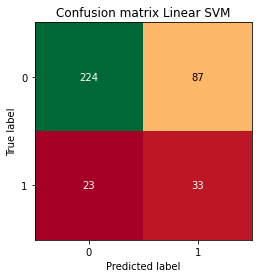

In [27]:
heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = SVM_value_y, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['0','1'],yticklabels=['0','1'], cmap ="RdYlGn", fmt="%d")
plt.title("Confusion matrix Linear SVM")
plt.gca().invert_yaxis()



In [28]:
Summary_lin_SVM= {'Type': 'Linear SVM', 'Train Score': best_para_lin_SVM.score(X_train, y_train)*100,
              'Testing Score':best_para_lin_SVM.score(X_test, y_test)*100,
                  'precision_score':precision_score(y_test, best_para_lin_SVM.predict(X_test)),
                  'recall_score':recall_score(y_test, best_para_lin_SVM.predict(X_test)),
              'f1 Score':f1_score(y_test, best_para_lin_SVM.predict(X_test)),
                  'roc_auc': roc_auc_score(y_test,best_para_lin_SVM.predict(X_test))};

In [29]:
Summary_lin_SVM

{'Type': 'Linear SVM',
 'Train Score': 77.86259541984732,
 'Testing Score': 70.02724795640327,
 'precision_score': 0.275,
 'recall_score': 0.5892857142857143,
 'f1 Score': 0.375,
 'roc_auc': 0.6547714745062012}

<h2>4.Kerenilzed Support Vector Machine (rbf, poly, and linear)</h2>

<b> GridSearch for Kerenilzed Support Vector Machine (rbf, poly, and linear) </b>

In [30]:
#SVM with kernels
kernelSVC_parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['rbf','poly','linear']}

In [31]:
from sklearn.model_selection import GridSearchCV

KernelSVC = SVC(random_state=random_state)
GS_KernelSVC = GridSearchCV(KernelSVC, kernelSVC_parameters, cv = 5, return_train_score= True, n_jobs= -1, scoring='roc_auc')
GS_KernelSVC.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'linear']},
             return_train_score=True, scoring='roc_auc')

In [32]:
print("Best score : KernelSVM grid search ")
round(GS_KernelSVC.best_score_,2)

Best score : KernelSVM grid search 


0.99

In [33]:
print("Best parameters- KernelSVM grid search ")
GS_KernelSVC.best_params_

Best parameters- KernelSVM grid search 


{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}

<h1> kernel = rbf </h1>

In [34]:
#svm with rbf
best_para_svm = SVC(C = 0.1, gamma = 100, kernel = 'rbf', verbose = 1,random_state=random_state)

best_para_svm.fit(X_train,y_train)
SVM_value_y = best_para_svm.predict(X_test)

[LibSVM]

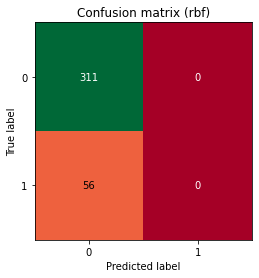

In [35]:
%matplotlib inline

heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = SVM_value_y, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['0','1'], yticklabels=['0','1'], cmap = "RdYlGn", fmt = "%d")
plt.title("Confusion matrix (rbf)")
plt.gca().invert_yaxis()

In [36]:
Summary_Kernelized= {'Type': 'Kernalized rbf ', 'Train Score': best_para_svm.score(X_train, y_train)*100,
              'Testing Score':best_para_svm.score(X_test, y_test)*100,
                'precision_score':precision_score(y_test, best_para_svm.predict(X_test)),
                     'recall_score':recall_score(y_test, best_para_svm.predict(X_test)),
              'f1 Score':f1_score(y_test, best_para_svm.predict(X_test)),
                'roc_auc': roc_auc_score(y_test,best_para_svm.predict(X_test))};

In [37]:
Summary_Kernelized

{'Type': 'Kernalized rbf ',
 'Train Score': 53.71269951422624,
 'Testing Score': 84.74114441416893,
 'precision_score': 0.0,
 'recall_score': 0.0,
 'f1 Score': 0.0,
 'roc_auc': 0.5}

<b>5.Decision Tree Classification.</b>

<b>Grid Search with Decision Tree Classifier</b>

In [38]:
#decision tree classifier
param_grid_dtree = {'max_depth': range(10,20),'criterion':['gini','entropy'],'min_samples_leaf' : range(2,10), 'min_samples_split': range(2,5)}

CV_dtrees = GridSearchCV(estimator = DecisionTreeClassifier(random_state=random_state), cv = 7, param_grid = param_grid_dtree , verbose = 1, n_jobs = -1,scoring='roc_auc')
GS_results_dtrees = CV_dtrees.fit(X_train, y_train)
best_parameters_dtrees = CV_dtrees.best_params_
print(best_parameters_dtrees)



Fitting 7 folds for each of 480 candidates, totalling 3360 fits
{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [39]:
print("Best score : Decision Tree grid search ")
round(GS_results_dtrees.best_score_,2)

Best score : Decision Tree grid search 


0.94

In [40]:
print("Best parameters : Decision Tree grid search ")
GS_results_dtrees.best_params_

Best parameters : Decision Tree grid search 


{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [41]:
best_dtree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=2,min_samples_split=2,random_state=random_state),max_samples=0.5,n_estimators=200,bootstrap=True, n_jobs=-1,random_state=random_state)

best_dtree.fit(X_train, y_train)
dtree_value_y = best_dtree.predict(X_test)

print('Training score: {:.3f}'.format(best_dtree.score(X_train, y_train)))
print('Testing score: {:.3f}'.format(best_dtree.score(X_test, y_test)))

Training score: 0.991
Testing score: 0.809


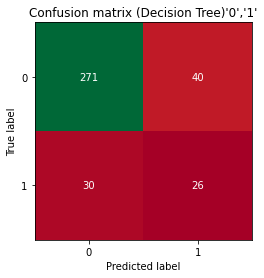

In [42]:
%matplotlib inline

heatmap = mglearn.tools.heatmap(
    confusion_matrix(y_pred = dtree_value_y, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['0','1'],yticklabels=['0','1'], cmap = "RdYlGn", fmt="%d")
plt.title("Confusion matrix (Decision Tree)'0','1'")

plt.gca().invert_yaxis()

In [43]:
Summary_dtree= {'Type': 'Decision Tree', 'Train Score': best_dtree.score(X_train, y_train)*100,
              'Testing Score':best_dtree.score(X_test, y_test)*100,
                'precision_score':precision_score(y_test, best_dtree.predict(X_test)),
                'recall_score':recall_score(y_test, best_dtree.predict(X_test)),
              'f1 Score':f1_score(y_test, best_dtree.predict(X_test)),
               'roc_auc': roc_auc_score(y_test,best_dtree.predict(X_test))};

In [44]:
Summary_dtree

{'Type': 'Decision Tree',
 'Train Score': 99.09784871616932,
 'Testing Score': 80.92643051771117,
 'precision_score': 0.3939393939393939,
 'recall_score': 0.4642857142857143,
 'f1 Score': 0.4262295081967213,
 'roc_auc': 0.6678341754708315}

<h1>Comparing All Models</h1>

In [45]:
Summary_Knn

{'Type': 'K-nearest Neighbors (KNN) Classification Model',
 'Training Score': 100.0,
 'precision_score': 0.23741007194244604,
 'Testing Score': 64.85013623978202,
 'recall_score': 0.5892857142857143,
 'f1 Score': 0.3384615384615385,
 'roc_auc': 0.6242248507119891}

In [46]:
Summary_Logistic

{'Type': 'Logistic Regression',
 'Train Score': 77.72380291464262,
 'Testing Score': 70.29972752043598,
 'precision_score': 0.27350427350427353,
 'recall_score': 0.5714285714285714,
 'f1 Score': 0.3699421965317919,
 'roc_auc': 0.6490583371612311}

In [47]:
Summary_lin_SVM

{'Type': 'Linear SVM',
 'Train Score': 77.86259541984732,
 'Testing Score': 70.02724795640327,
 'precision_score': 0.275,
 'recall_score': 0.5892857142857143,
 'f1 Score': 0.375,
 'roc_auc': 0.6547714745062012}

In [48]:
Summary_Kernelized

{'Type': 'Kernalized rbf ',
 'Train Score': 53.71269951422624,
 'Testing Score': 84.74114441416893,
 'precision_score': 0.0,
 'recall_score': 0.0,
 'f1 Score': 0.0,
 'roc_auc': 0.5}

In [49]:
Summary_dtree

{'Type': 'Decision Tree',
 'Train Score': 99.09784871616932,
 'Testing Score': 80.92643051771117,
 'precision_score': 0.3939393939393939,
 'recall_score': 0.4642857142857143,
 'f1 Score': 0.4262295081967213,
 'roc_auc': 0.6678341754708315}

# Best model ( 5 points)
Explain which machine learning model is the best model for this dataset and why? 

# Linear SVM Model is the best model for this dataset 

Here, Our dataset is highly inbalanced (~4:1). 

- Testing score for 'RBF model' is very high, however, the model actually predicting all class labels as zero. This supports the fact that for unbalanced data accuracy is not best parameter to decide quality of the model.

- Logistic and Linear SVM model has good recall(~60%), however, these models have less precision(<30%). These suggests that models are predicting many false positives, hence, none of those is the best model.

- 'Decision Tree' model has the highest f1-score. Despite having lesser recall than some other models, it has the highest precision among all the models. Hence, 'Decision Model' is the best model for this dataset. 




In [50]:
best_model = best_dtree

In [51]:
best_model

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=12,
                                                        min_samples_leaf=2,
                                                        random_state=42),
                  max_samples=0.5, n_estimators=200, n_jobs=-1,
                  random_state=42)

In [52]:
 final_test_prediction = best_model.predict(test)

In [53]:
final_test_prediction

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [54]:
# len(final_test_prediction)